In [1]:
import numpy as np
import random
from math import sin, cos, pi
import matplotlib.pyplot as plt
import time

In [2]:
n = 10   # number of harmonics
w = 900  # the highest frequency
N = 256  # number of signals
number = w/(n - 1)  # the difference between harmonics

# frequency generation
W = lambda n, w: w - n * number
w_values = [W(n, w) for n in range(n)]
x = np.zeros(N)

In [3]:
def plot(function):
    plt.figure(figsize=(20, 15))
    plt.plot(function)
    plt.grid(True)
    plt.show()

In [4]:
#generating random signal
random.seed(42)
for j in range(n):
    amplitude = random.choice([i for i in range(-10, 10) if i != 0])
    phi = random.randint(-360, 360)
    for t in range(N):
        x[t] += amplitude * sin(w_values[j] * t + phi)

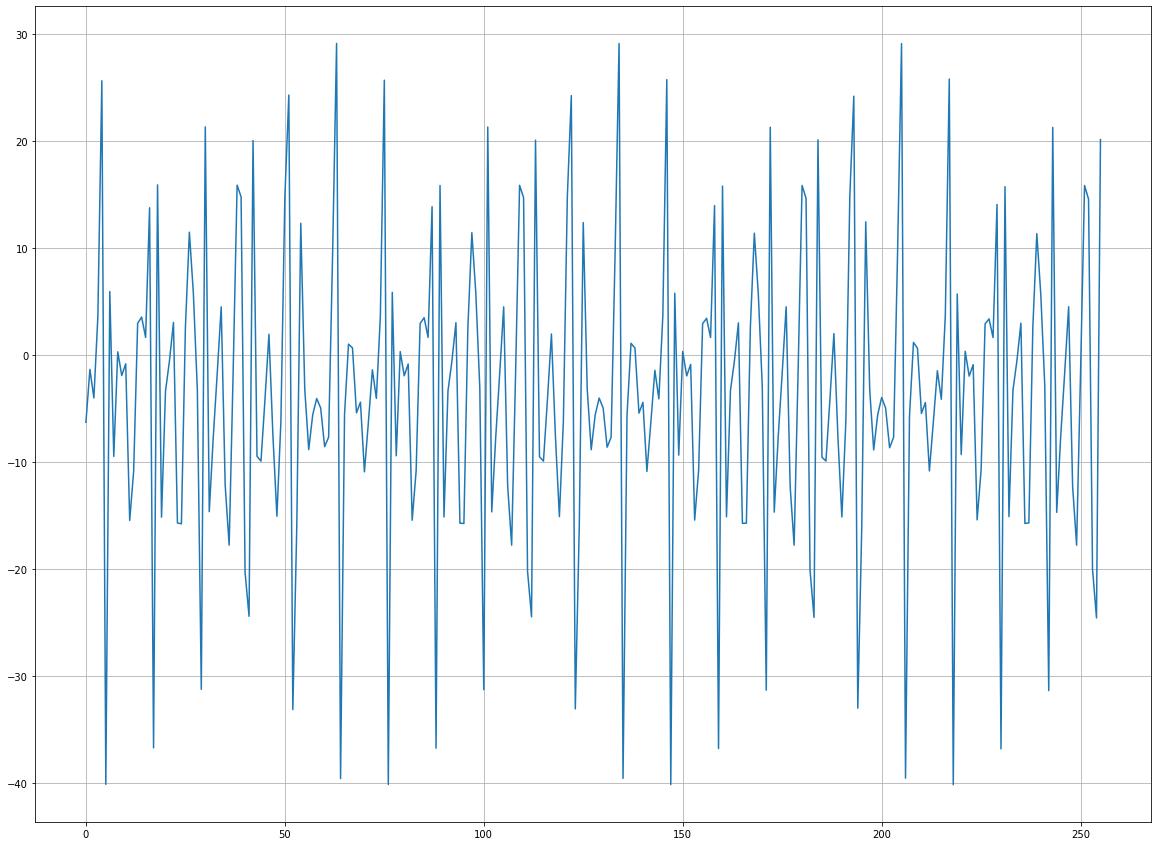

In [5]:
plot(x)

In [6]:
#F = np.zeros(N)
#real_f_even = np.zeros(int(N/2))
#im_f_even = np.zeros(int(N/2))
#real_f_odd = np.zeros(int(N/2))
#im_f_odd = np.zeros(int(N/2))

#for m in range(int(N/2)):
#    for p in range(int(N/2)):
        # for even numbers
#        real_f_even[m] += x[2*m] * cos(4*pi/N * p * m)
#        im_f_even[m] += x[2*m] * sin(4*pi/N * p * m)
        # for odd 
#        real_f_odd[m] += x[2*m + 1] * cos(4*pi/N * p * m)
#        im_f_odd[m] += x[2*m + 1] * sin(4*pi/N * p * m)
        

In [5]:
F = np.zeros(N)
F_real = np.zeros(N)
F_im = np.zeros(N)

for p in range(N):
    for k in range(N):
        F_real[p] += x[k] * cos(2*pi/N * p * k)
        F_im[p] += x[k] * sin(2*pi/N * p * k)
for i in range(N):
    F[i] += F_real[i] + F_im[i]

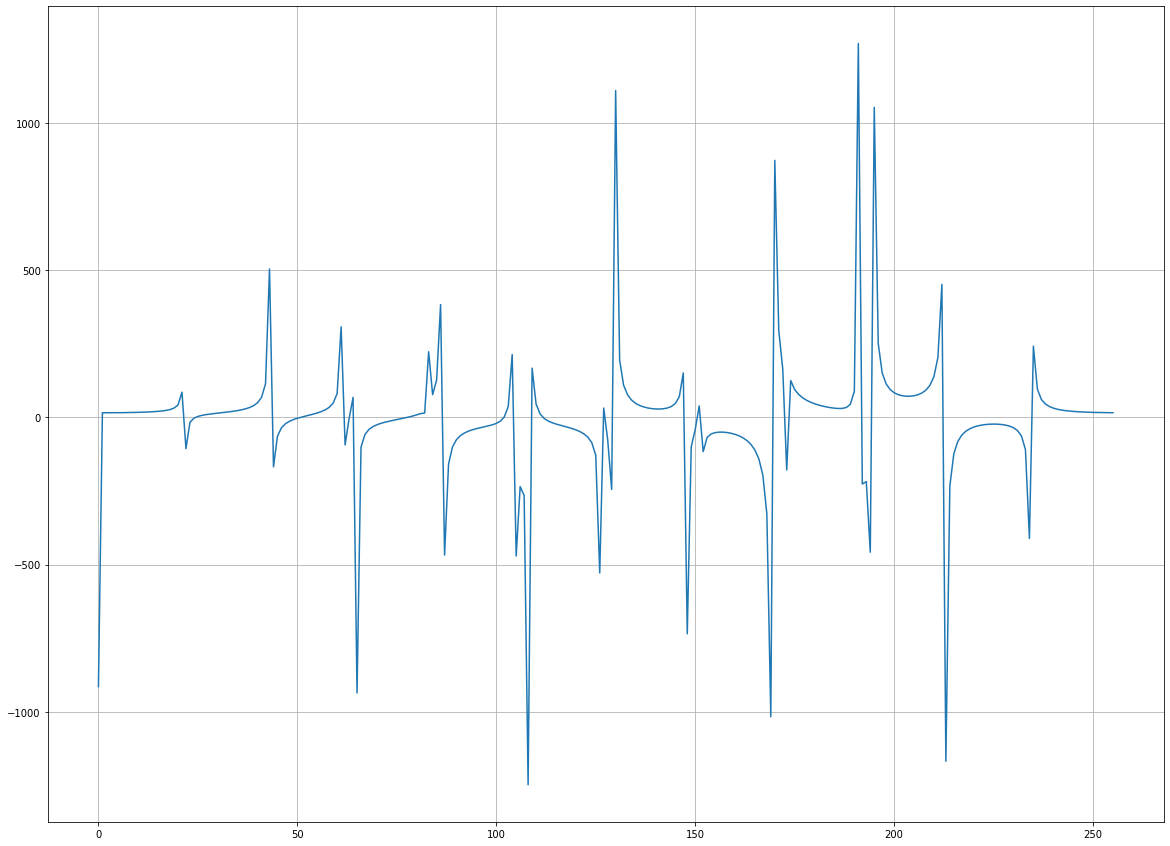

In [8]:
plot(F)

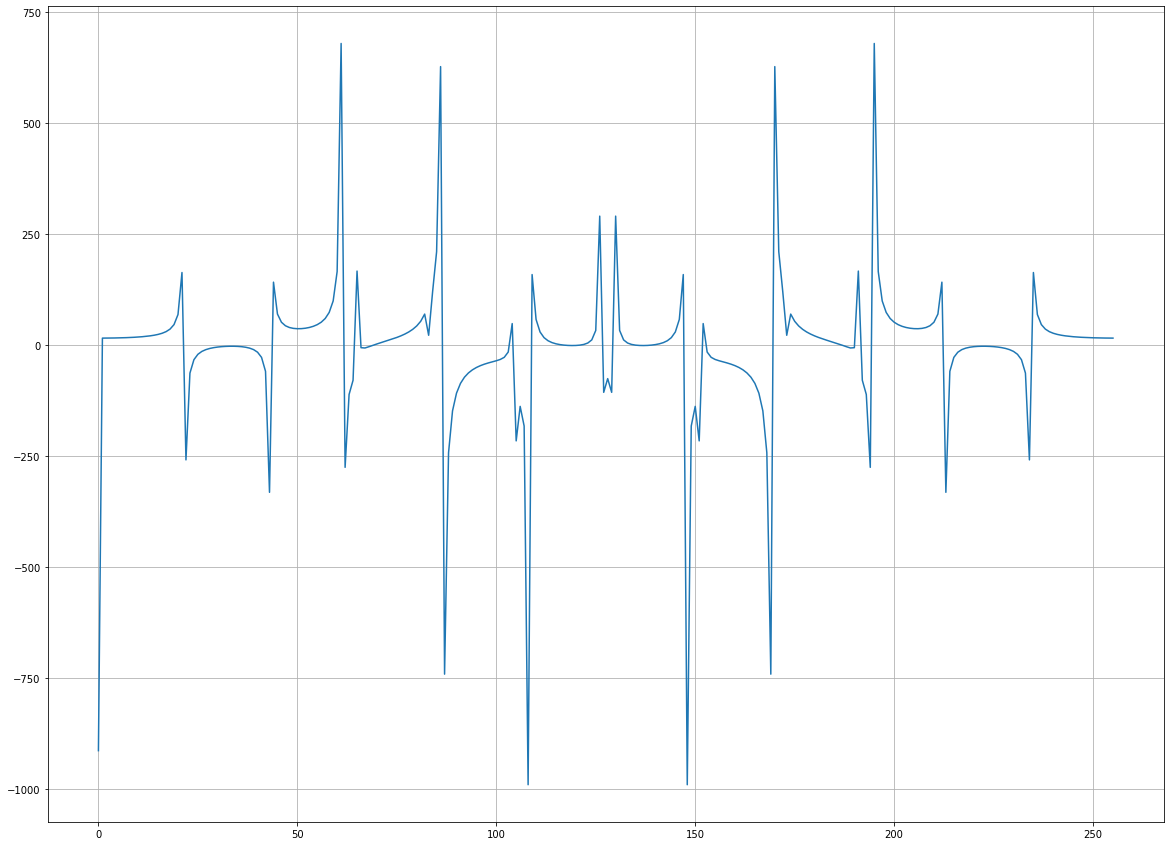

In [26]:
plot(F_real)

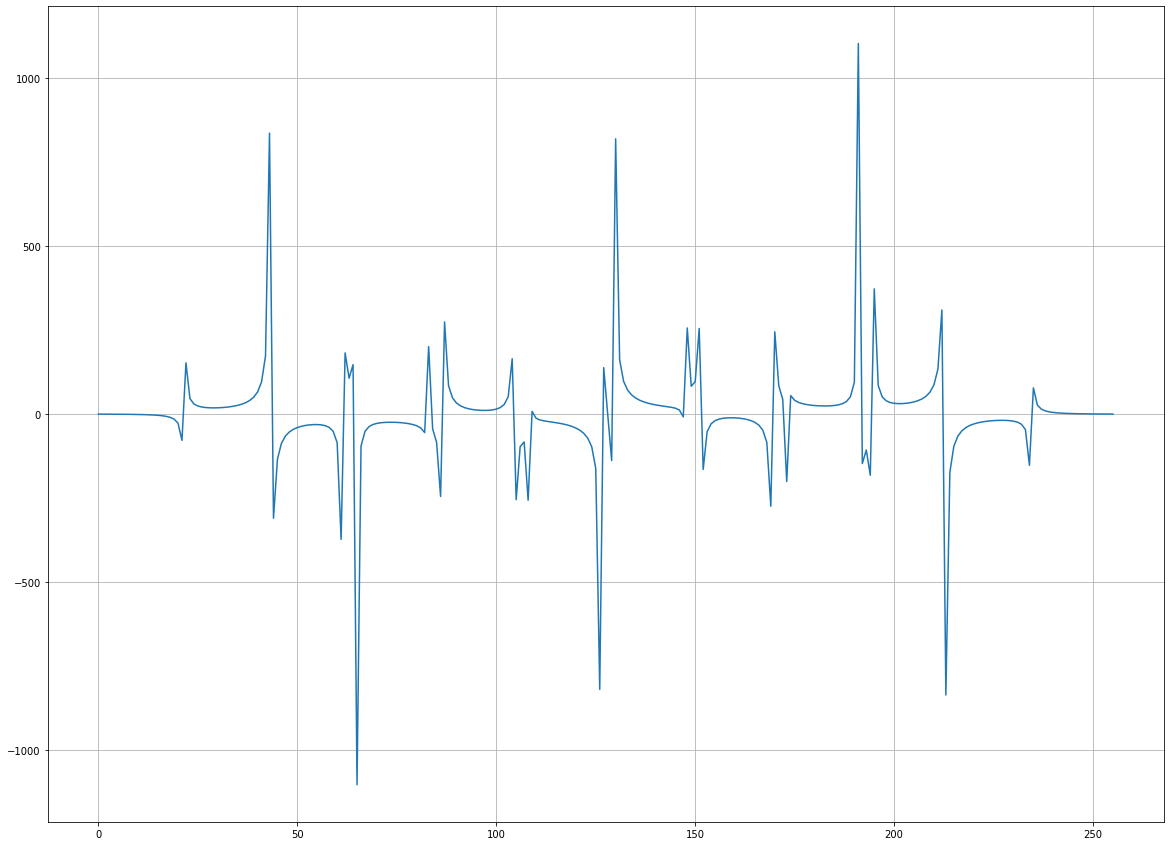

In [27]:
plot(F_im)

In [6]:
def multi_plot(y1, y2, y3):
    plt.figure(figsize=(20, 15))
    plt.plot(y1, 'b', label="F_real")
    plt.plot(y2, 'r', label="F_im")
    plt.plot(y3, 'k', label="F (sum)")
    plt.grid(True)
    plt.legend(prop={'size': 16}, loc='upper right', borderaxespad=0.)
    plt.show()

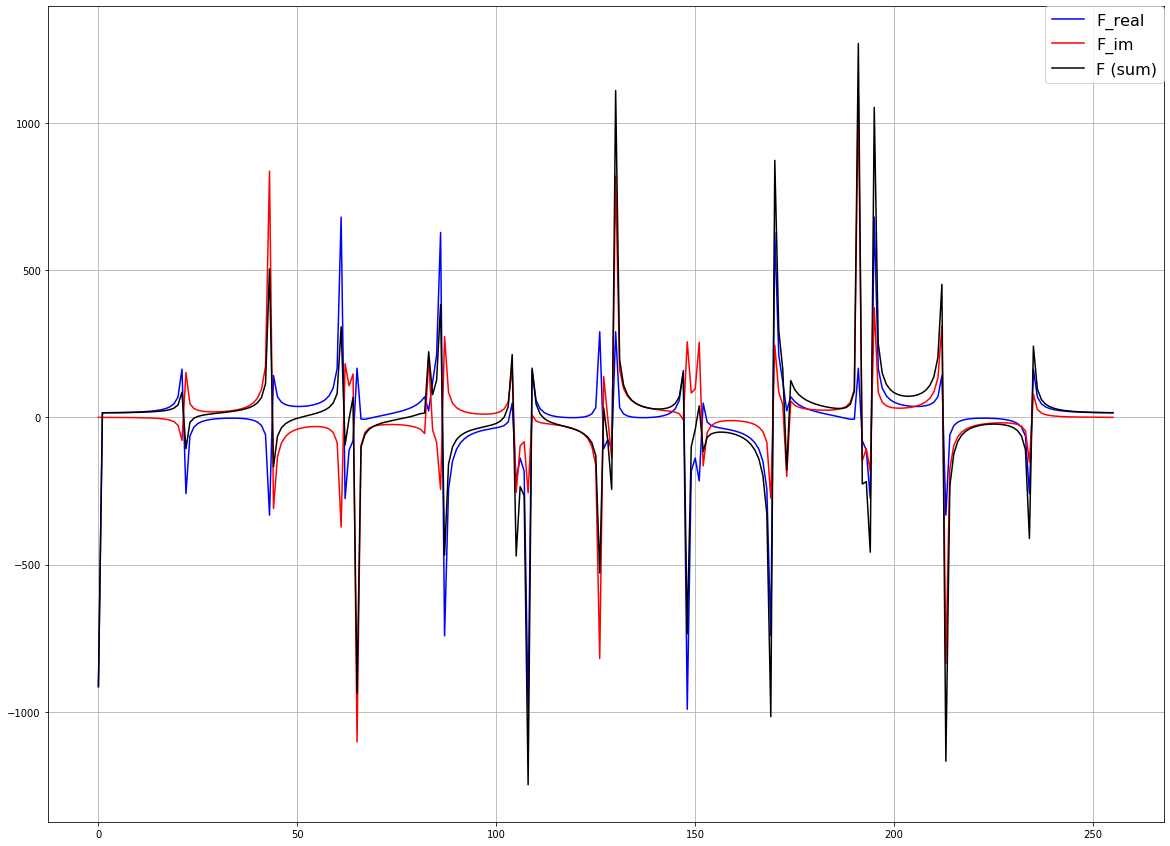

In [28]:
multi_plot(F_real, F_im, F)

In [14]:
# Testing Task
w_coeff = np.zeros(shape=(N, N))
for p in range(N):
    for k in range(N):
        w_coeff[p][k] = cos(2*pi/N * p * k) + sin(2*pi/N * p * k)

In [15]:
w_coeff

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.02424005, 1.04786313, ..., 0.92372589, 0.94972778,
        0.97515759],
       [1.        , 1.04786313, 1.09320187, ..., 0.84244604, 0.89716759,
        0.94972778],
       ...,
       [1.        , 0.92372589, 0.84244604, ..., 1.19480337, 1.13590698,
        1.07085502],
       [1.        , 0.94972778, 0.89716759, ..., 1.13590698, 1.09320187,
        1.04786313],
       [1.        , 0.97515759, 0.94972778, ..., 1.07085502, 1.04786313,
        1.02424005]])

In [16]:
F_new = np.zeros(N)
F_real_new = np.zeros(N)
F_im_new = np.zeros(N)

for p in range(N):
    for k in range(N):
        F_new[p] += x[k] * w_coeff[p][k]

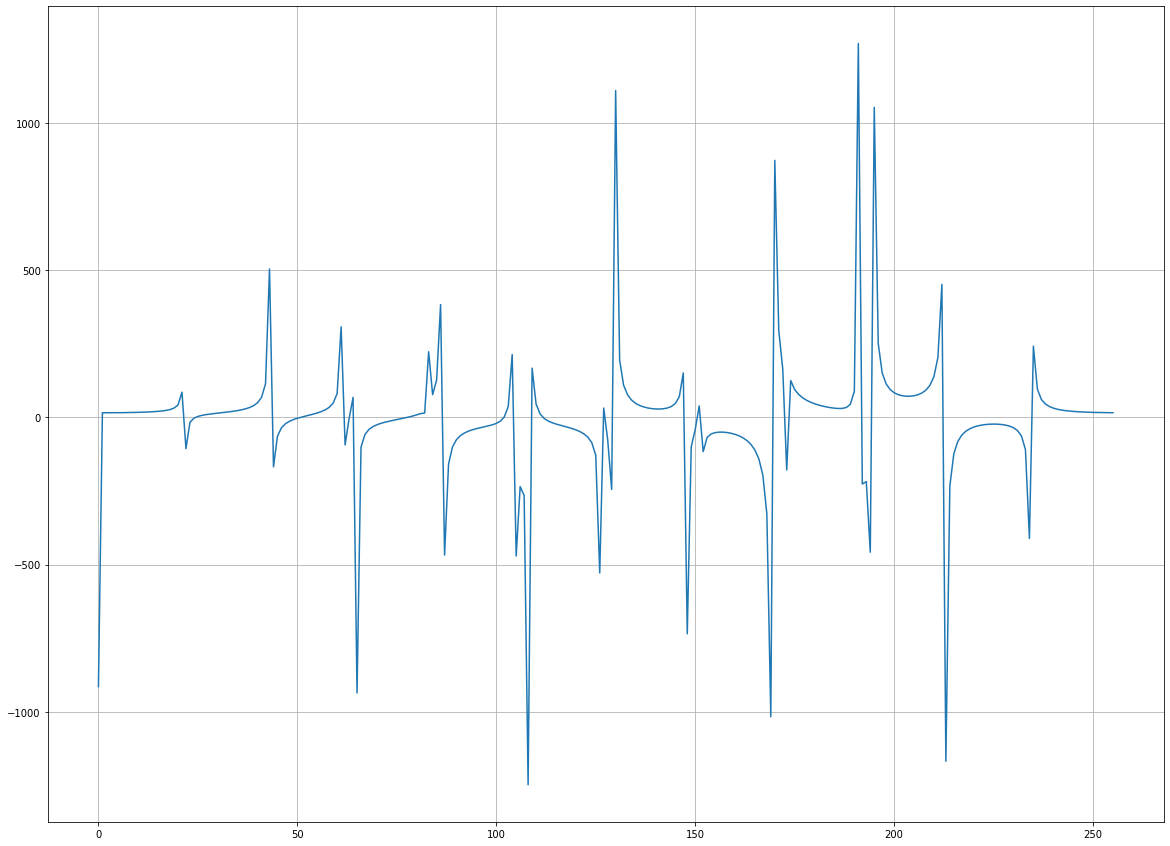

In [17]:
plot(F_new)

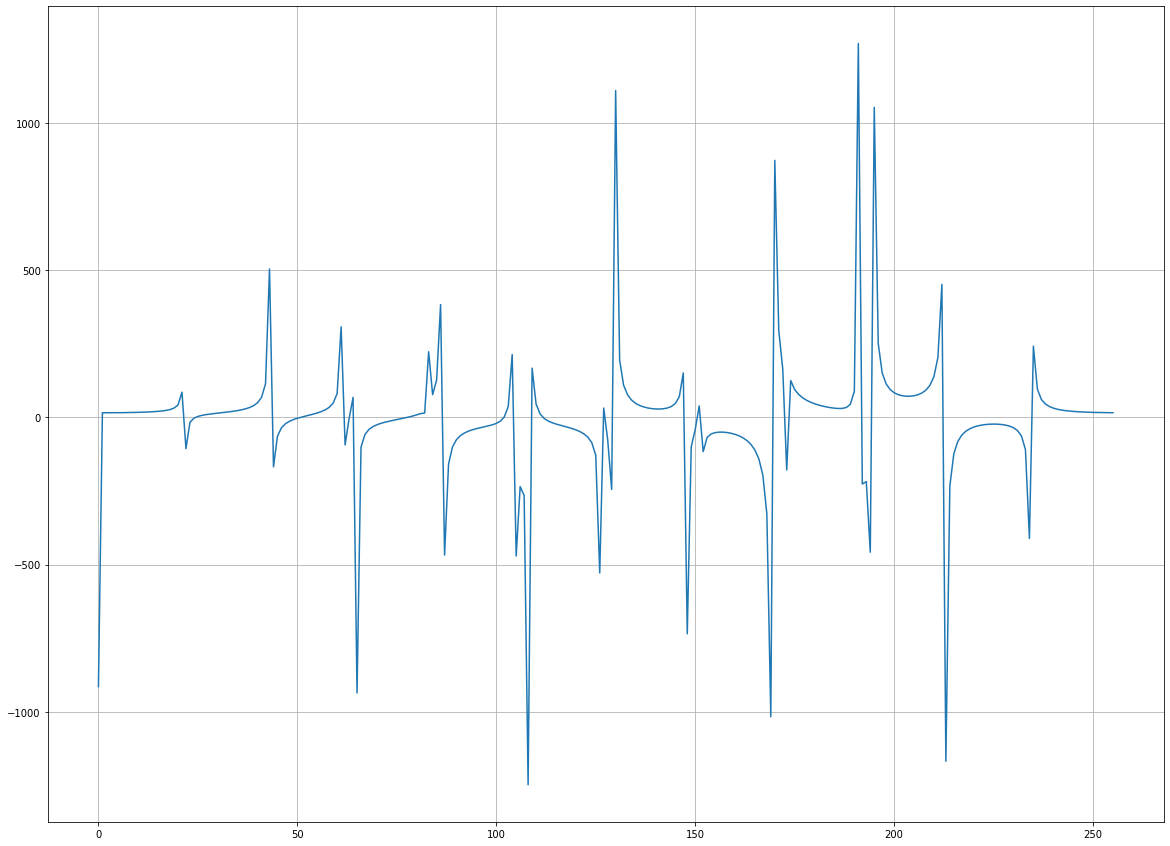

In [11]:
plot(F)